# **Tugas**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

    - Metode pra pengolahan

    - Pemilihan fitur

    - Arsitektur ANN

    - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

- DIKERJAKAN SECARA BERKELOMPOK

- JELASKAN HASIL YANG ANDA DAPATKAN,

    - AKURASI

    - CONFUSION MATRIX

    - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

### **Langkah 1: Import Library**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


### **Langkah 2: Load dan Pra-Pengolahan Data**

Load Data:

Dataset MNIST diambil langsung dari keras.datasets dan dibagi menjadi data pelatihan dan pengujian.

Normalisasi Data:

Data citra distandarisasi dengan membagi nilai piksel (0–255) dengan 255 untuk memastikan nilai berada pada skala 0 hingga 1, yang membantu mempercepat konvergensi model.

One-Hot Encoding Label:

Label dikonversi menjadi one-hot encoded untuk digunakan dalam klasifikasi multi-kelas.

In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to fit ANN input
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 22s 2us/step


### **Langkah 3: Arsitektur ANN dan Pemilihan Hyperparameter**

Arsitektur model ANN dikembangkan dengan konfigurasi sebagai berikut:

Lapisan Input: Terima gambar berukuran 784 fitur (28x28).

Hidden Layers: Dua lapisan tersembunyi dengan masing-masing 128 neuron menggunakan aktivasi ReLU.

Output Layer: Satu lapisan keluaran dengan 10 neuron dan fungsi aktivasi softmax untuk klasifikasi multi-kelas.

In [3]:
# Initialize ANN model
model = tf.keras.models.Sequential()

# Input layer + First hidden layer
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

# Second hidden layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Langkah 4: Compile dan Train Model**

Model dikompilasi menggunakan:

Optimizer: adam

Loss function: categorical_crossentropy untuk klasifikasi multi-kelas

Metrik: accuracy

In [4]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8807 - loss: 0.4131 - val_accuracy: 0.9610 - val_loss: 0.1249
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9688 - loss: 0.1029 - val_accuracy: 0.9735 - val_loss: 0.0845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9797 - loss: 0.0640 - val_accuracy: 0.9714 - val_loss: 0.0945
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0477 - val_accuracy: 0.9759 - val_loss: 0.0886
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9873 - loss: 0.0390 - val_accuracy: 0.9768 - val_loss: 0.0751
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9748 - val_loss: 0.0937
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0232 - val_accuracy: 0.9768 - val_loss: 0.0870
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9928 - loss: 0.0224 -

### **Langkah 5: Evaluasi Model dan Hasil**

Akurasi

In [5]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.1520
Test Accuracy: 0.9732999801635742


Confunsion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


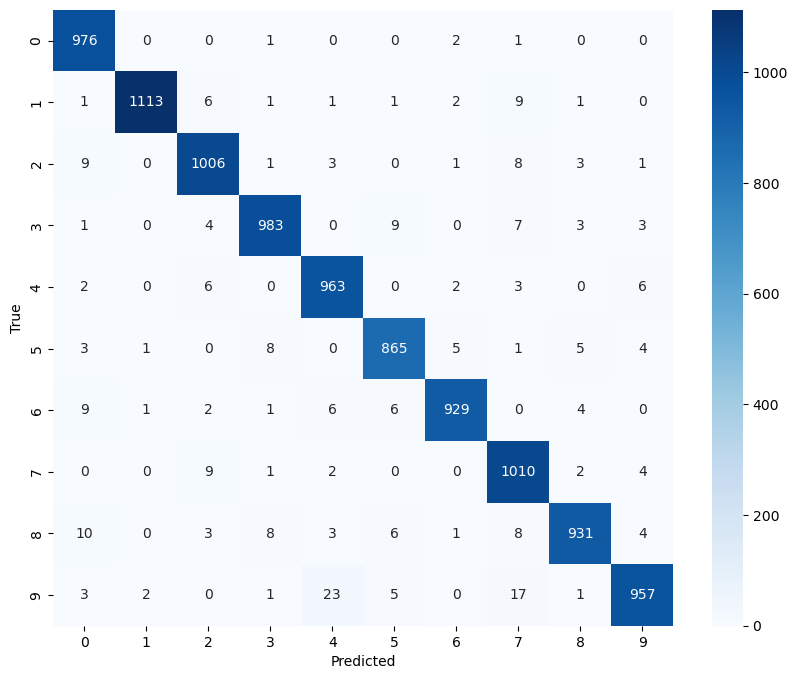

In [6]:
# Predictions for confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
